In [20]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
#reading the text from reads.txt file
text = open('reads.txt', encoding='utf-8').read()
# print(text)

In [21]:
#to lowercase
lower_case = text.lower()
# print(lower_case)

In [22]:
#removing punctuations
import string
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
# print(cleaned_text)

In [23]:
#spliting each word into a list
tokenized_words =  word_tokenize(cleaned_text,"english")

#removing all the words which do not add any meaning like I, there, etc
# stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
#               "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
#               "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
#               "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
#               "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
#               "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
#               "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
#               "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
#               "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
#               "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

final_words = []
for word in tokenized_words:
    if word not in stopwords.words("english"):
        final_words.append(word)
# print(final_words)

##### NLP EMOTION ALGORITHM


In [24]:
emotion_list = []
with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word, emotion = clear_line.split(':')
        
        if word in final_words:
            emotion_list.append(emotion)
# print(emotion_list)

Positive Sentiment


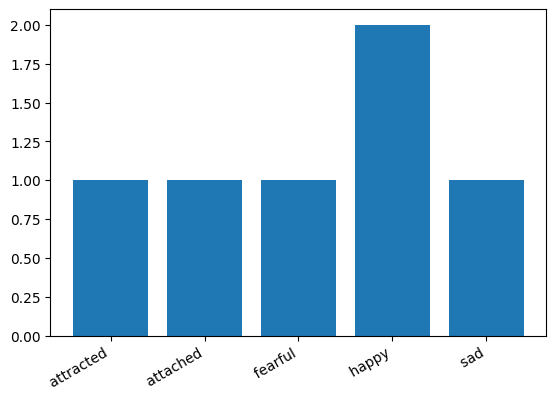

In [29]:
w = Counter(emotion_list)
# print(w)

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
#     print(score)
    neg, pos = score['neg'], score['pos']
    if neg > pos:
        print("Negative Sentiment")
    elif pos > neg:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

sentiment_analyse(cleaned_text)
                  
fig, axl = plt.subplots()
axl.bar(w.keys(), w.values())
fig.autofmt_xdate() #automatically update the x and y axis that all values adjust
plt.savefig('graph.png')
plt.show()
